In [24]:
import os

import scipy
from scipy import stats
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Загрузка данных

In [25]:
paths = glob.glob(f"build/*.csv")

In [26]:
data = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=12, names=['name', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'E'])
    data = pd.concat((data, item), ignore_index=True)

## Первичная статистика ускорителя

In [29]:
data = data.dropna()
data

,name,x,y,z,vx,vy,vz,E
0,gamma,-19.0389,-3.0202,-20.0,-0.779773,-0.09588,1.9742,2.12478
2,gamma,-4.31542,-14.9316,-20.0,-0.32251,-1.15153,3.31092,1.50649
4,e-,0.433105,-8.96462,8.67934,0.057131,0.169142,-0.213094,0.067933
6,e-,1.54936,-9.05861,9.13039,0.138785,-0.042415,0.010023,0.016491
8,e-,-5.83132,-5.51564,10.5267,-0.076987,-0.054563,0.003875,0.008391
...,...,...,...,...,...,...,...,...
58634,gamma,10.7564,16.427,-20.0,0.066166,0.096656,0.231791,0.247842
58636,e-,12.8596,19.8177,-6.76057,0.012146,0.030566,-0.075752,0.006395
58638,e-,13.1215,19.2366,-6.74015,0.116619,0.005247,0.104325,0.022857
58640,e-,12.711,17.7946,-7.62074,-0.026914,-0.1851,0.149964,0.050704


In [30]:
l = len(data)
res = []
for name in set(data['name']):
    count = len(data[data['name'] == name])
    res.append((name, count, count/l*100))
    
pd.DataFrame(res, columns=['name', 'count', 'percent'])

,name,count,percent
0,nu_e,177,0.603642
1,neutron,541,1.845031
2,gamma,9960,33.967669
3,e-,17615,60.074347
4,O16,74,0.252370
5,proton,611,2.083760
6,anti_nu_e,226,0.770752
7,e+,104,0.354682
8,deuteron,14,0.047746


## Распределение по координатам

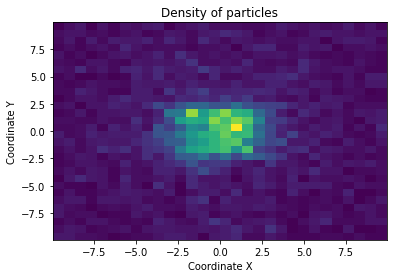

In [31]:
center = data[(-10 < data['x']) & (data['x'] < 10) & (-10 < data['y']) & (data['y'] < 10)]
plt.hist2d(center['x'], center['y'], bins=30)
plt.title('Density of particles')
plt.xlabel('Coordinate X')
plt.ylabel('Coordinate Y')
plt.show()

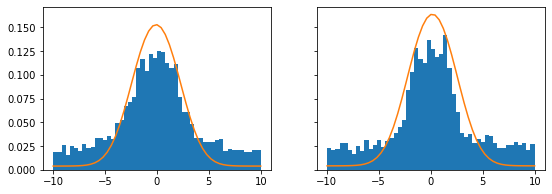

In [32]:
cnt_x = np.array(center['x'], dtype=float)
cnt_y = np.array(center['y'], dtype=float)

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

_, bins, _ = axs[0].hist(cnt_x, 50, density=True)
mu, sigma = stats.norm.fit(cnt_x)
best_fit_line1 = stats.norm.pdf(bins, mu+1.13, sigma*0.45)
best_fit_line2 = stats.norm.pdf(bins, mu-1.13, sigma*0.45)
best_fit_line3 = stats.norm.pdf(bins, mu, sigma*10)
axs[0].plot(bins, (best_fit_line1+best_fit_line2+best_fit_line3)/2.4)

_, bins, _ = axs[1].hist(cnt_y, 50, density=True)
mu, sigma = stats.norm.fit(cnt_y)
best_fit_line1 = stats.norm.pdf(bins, mu+1.13, sigma*0.45)
best_fit_line2 = stats.norm.pdf(bins, mu-1.13, sigma*0.45)
best_fit_line3 = stats.norm.pdf(bins, mu, sigma*10)
axs[1].plot(bins, (best_fit_line1+best_fit_line2+best_fit_line3)/2.2)

plt.show()

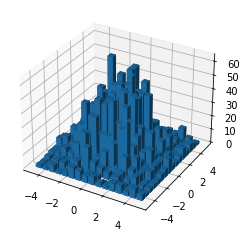

In [33]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = center['x'], center['y']
hist, xedges, yedges = np.histogram2d(x, y, bins=16, range=[[-5, 5], [-5, 5]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

## Распределение по энергиям (взяты только гамма и электроны)

In [34]:
center = data[(-4 < data['x']) & (data['x'] < 4) & (-4 < data['y']) & (data['y'] < 4)]

In [35]:
center_gamma = center[center['name'] == 'gamma']
center_e = center[center['name'] == 'e-']

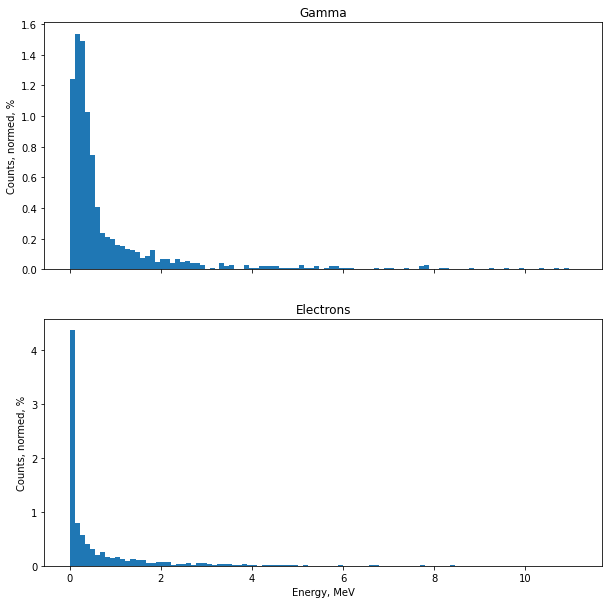

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

axs[0].hist(center_gamma['E'], bins=100, density=True)
axs[0].set_title('Gamma')
axs[0].set_ylabel('Counts, normed, %')

axs[1].hist(center_e['E'], bins=100, density=True)
axs[1].set_title('Electrons')
axs[1].set_ylabel('Counts, normed, %')
axs[1].set_xlabel('Energy, MeV')
plt.show()

## Распределение по скоростям

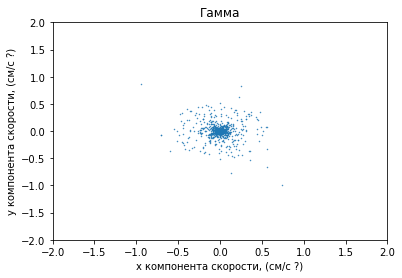

In [37]:
plt.scatter(center_gamma['vx'], center_gamma['vy'], s=0.2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Гамма')
plt.xlabel('x компонента скорости, (см/с ?)')
plt.ylabel('y компонента скорости, (см/с ?)')
plt.show()

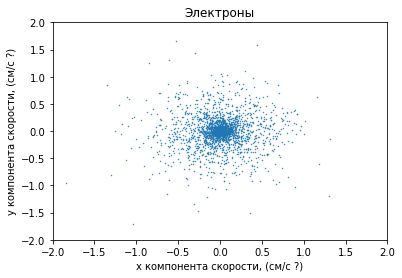

In [38]:
plt.scatter(center_e['vx'], center_e['vy'], s=0.2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Электроны')
plt.xlabel('x компонента скорости, (см/с ?)')
plt.ylabel('y компонента скорости, (см/с ?)')
plt.show()

## Визуализация векторов скоростей

In [61]:
to_viz = center_gamma[['x','y','z', 'vx','vy','vz']]

In [62]:
to_viz = to_viz[:500].T.to_numpy()
to_viz.shape

(6, 500)

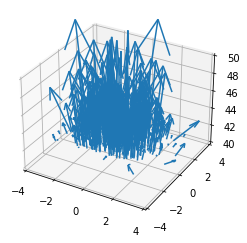

In [63]:
X, Y, Z, U, V, W = [to_viz[cor_vel] for cor_vel in range(len(to_viz))]
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
ax3d.set_proj_type('persp')
ax3d.quiver(X, Y, Z, U, V, W)
ax3d.set_xlim([-4, 4])
ax3d.set_ylim([-4, 4])
ax3d.set_zlim([40, 50])
plt.show()